# **Data Pre-processing**

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, silhouette_samples, silhouette_score, adjusted_rand_score, accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.manifold import TSNE

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from pandas.plotting import parallel_coordinates
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Circle, Ellipse

import numpy as np
import pandas as pd
import random

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/Global_cleaned.csv')
data.head()

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,...,DstRate,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,predicted
0,34393.0,24.0,0.133023,0.133023,0.133023,0.133023,0.133023,0.133023,0.0,0.0,...,30.069990,1635.0,879.0,3.278968e+09,4.135953e+09,0.000000,0.000000,0.000000,247547.0,3:URLLC
1,727022.0,250.0,0.001092,0.001092,0.001092,0.001092,0.001092,0.001092,0.0,0.0,...,0.000000,68096.0,31104.0,6.108380e+08,1.659091e+09,0.079877,0.041040,0.038837,350131.0,3:URLLC
2,693697.0,1959.0,0.014081,0.014081,0.014081,0.014081,0.014081,0.014081,0.0,0.0,...,71.017685,97792.0,31104.0,3.649189e+09,1.482432e+09,0.012972,0.000953,0.012019,100319.0,3:URLLC
3,22844.0,14.0,0.132893,0.132893,0.132893,0.132893,0.132893,0.132893,0.0,0.0,...,30.099403,1751.0,947.0,1.882601e+08,4.396569e+08,0.000000,0.000000,0.000000,231497.0,3:URLLC
4,36309.0,7.0,3.521330,3.521330,3.521330,3.521330,3.521330,3.521330,0.0,0.0,...,7.099590,4094.0,5549.0,1.094324e+09,3.441728e+09,0.000000,0.000000,0.000000,197655.0,3:URLLC


In [4]:
# Select relevant features for clustering (excluding LTE/5g Category and Time)
temp_X = data.drop(columns=['predicted'])
temp_X

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,...,SrcRate,DstRate,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID
0,34393.000000,24.000000,0.133023,0.133023,0.133023,0.133023,0.133023,0.133023,0.0,0.0,...,30.069990,30.069990,1635.0,879.0,3.278968e+09,4.135953e+09,0.000000,0.000000,0.000000,2.475470e+05
1,727022.000000,250.000000,0.001092,0.001092,0.001092,0.001092,0.001092,0.001092,0.0,0.0,...,0.000000,0.000000,68096.0,31104.0,6.108380e+08,1.659091e+09,0.079877,0.041040,0.038837,3.501310e+05
2,693697.000000,1959.000000,0.014081,0.014081,0.014081,0.014081,0.014081,0.014081,0.0,0.0,...,142.035370,71.017685,97792.0,31104.0,3.649189e+09,1.482432e+09,0.012972,0.000953,0.012019,1.003190e+05
3,22844.000000,14.000000,0.132893,0.132893,0.132893,0.132893,0.132893,0.132893,0.0,0.0,...,30.099403,30.099403,1751.0,947.0,1.882601e+08,4.396569e+08,0.000000,0.000000,0.000000,2.314970e+05
4,36309.000000,7.000000,3.521330,3.521330,3.521330,3.521330,3.521330,3.521330,0.0,0.0,...,5.111705,7.099590,4094.0,5549.0,1.094324e+09,3.441728e+09,0.000000,0.000000,0.000000,1.976550e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9895,455292.377185,281.829734,3.620188,3.961441,3.642492,4.080528,3.689328,3.684907,0.0,0.0,...,2.019412,1.594339,64256.0,64896.0,1.202037e+09,1.485176e+08,0.595314,0.723920,0.032170,2.373585e+06
9896,455262.025767,298.318232,4.376486,2.966175,3.594366,3.873222,3.280655,3.083385,0.0,0.0,...,2.029394,1.400239,64256.0,64896.0,1.202037e+09,1.485176e+08,0.652207,0.874332,0.028468,2.367298e+06
9897,455286.246951,293.324452,3.818366,3.667252,4.340313,4.514485,3.882577,4.103266,0.0,0.0,...,2.037339,1.626468,64256.0,64896.0,1.202037e+09,1.485176e+08,0.876566,0.250007,0.041358,2.383580e+06
9898,455211.102576,171.202752,4.414447,4.101491,4.156414,4.301263,4.173065,4.550792,0.0,0.0,...,1.797084,1.408035,64256.0,64896.0,1.202037e+09,1.485176e+08,0.547553,0.645027,0.027258,2.384146e+06


In [5]:
# Apply T-SNE to reduce to 2 dimensions
tsne = TSNE(n_components=2, random_state=42)  # Reduce to 2 dimensions
X = tsne.fit_transform(temp_X)
X

array([[-43.343292  ,  69.70497   ],
       [ 40.87097   , -28.573046  ],
       [ 18.686598  ,  78.52902   ],
       ...,
       [ 93.77926   ,  -1.3721609 ],
       [ 94.41621   ,  -0.74245375],
       [ 95.88563   ,  -2.7426112 ]], dtype=float32)

In [110]:
temp_y = data['predicted']
temp_y

0       3:URLLC
1       3:URLLC
2       3:URLLC
3       3:URLLC
4       3:URLLC
         ...   
9895     2:mMTC
9896     2:mMTC
9897     2:mMTC
9898     2:mMTC
9899     2:mMTC
Name: predicted, Length: 9900, dtype: object

In [112]:
y = temp_y.str.split(':').str[0].astype(int)
y

0       3
1       3
2       3
3       3
4       3
       ..
9895    2
9896    2
9897    2
9898    2
9899    2
Name: predicted, Length: 9900, dtype: int64

In [113]:
np.unique(y)

array([1, 2, 3])

In [114]:
# Split the dataset into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.1, random_state=42)
X_train

array([[ 39.44178  ,  48.747818 ],
       [  5.2709107,  15.974469 ],
       [ 60.179085 , -19.802868 ],
       ...,
       [ 50.131584 ,  17.523788 ],
       [ 13.014835 , -62.323616 ],
       [  6.049587 ,  16.888737 ]], dtype=float32)

In [115]:
X_val

array([[ 49.331264 , -47.06295  ],
       [-29.174725 ,  42.291153 ],
       [-60.500854 , -14.580714 ],
       ...,
       [-30.056175 , -37.66971  ],
       [-33.076588 ,  44.456516 ],
       [ -3.5980089, -58.979507 ]], dtype=float32)

In [116]:
y_train

9789    2
7263    2
2932    1
9786    2
2270    1
       ..
5734    1
5191    1
5390    1
860     2
7270    2
Name: predicted, Length: 8910, dtype: int64

In [117]:
y_val

8432    2
5680    1
4767    1
9218    2
621     2
       ..
8640    2
9155    2
594     2
5563    1
3434    1
Name: predicted, Length: 990, dtype: int64

# **EDA**

## **t-SNE (t-Distributed Stochastic Neighbor Embedding)**

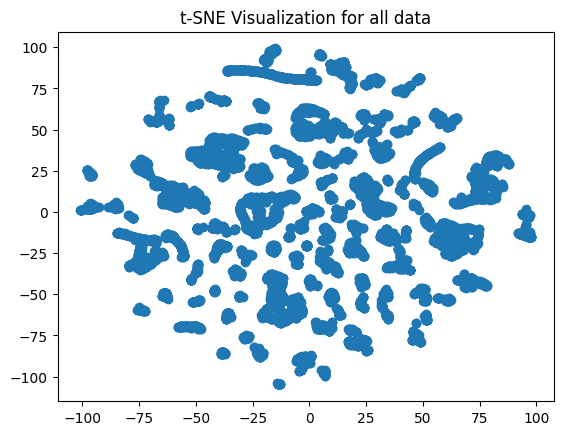

In [12]:
# Plot t-SNE visualization
plt.scatter(X[:, 0], X[:, 1])
plt.title('t-SNE Visualization for all data')
# plt.xlabel('t-SNE Component 1')
# plt.ylabel('t-SNE Component 2')
plt.show()

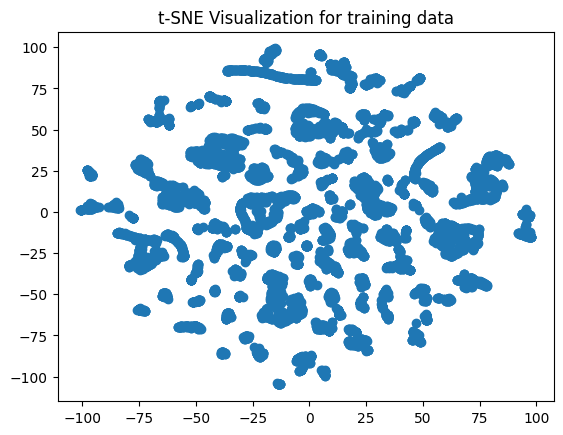

In [13]:
# Plot t-SNE visualization
plt.scatter(X_train[:, 0], X_train[:, 1])
plt.title('t-SNE Visualization for training data')
# plt.xlabel('t-SNE Component 1')
# plt.ylabel('t-SNE Component 2')
plt.show()

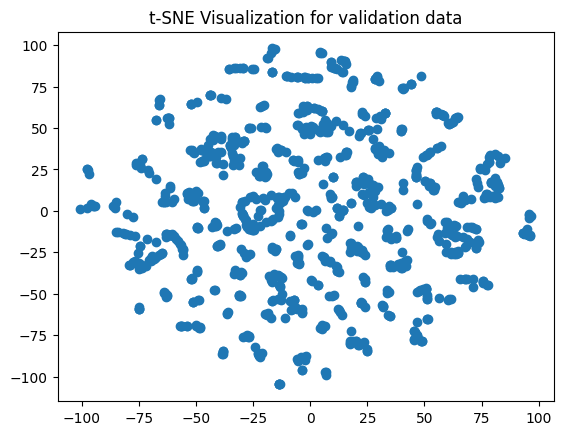

In [119]:
# Plot t-SNE visualization
plt.scatter(X_val[:, 0], X_val[:, 1])
plt.title('t-SNE Visualization for validation data')
# plt.xlabel('t-SNE Component 1')
# plt.ylabel('t-SNE Component 2')
plt.show()

# **Optimum Cluster Analysis**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

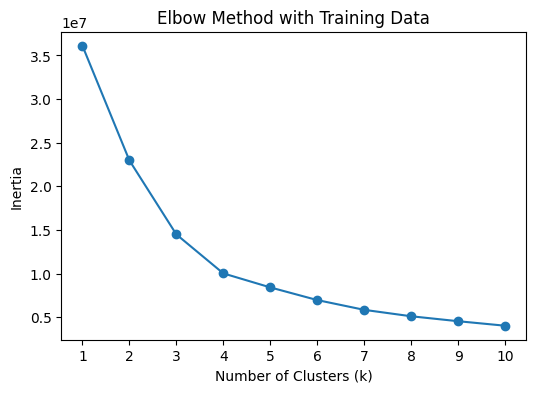

In [15]:
# Elbow Method
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit_predict(X_train)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method with Training Data')
plt.xticks(range(1, 11))
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

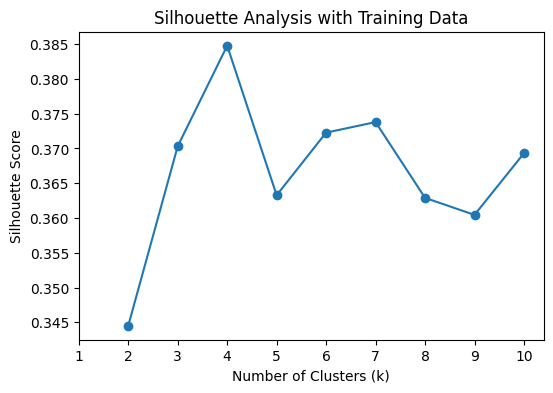

In [16]:
# Silhouette Analysis
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_train)
    silhouette_scores.append(silhouette_score(X_train, labels))

plt.figure(figsize=(6, 4))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis with Training Data')
plt.xticks(range(1, 11))
plt.show()

In [17]:
!pip install gap-stat

Optimal number of clusters: 1.0


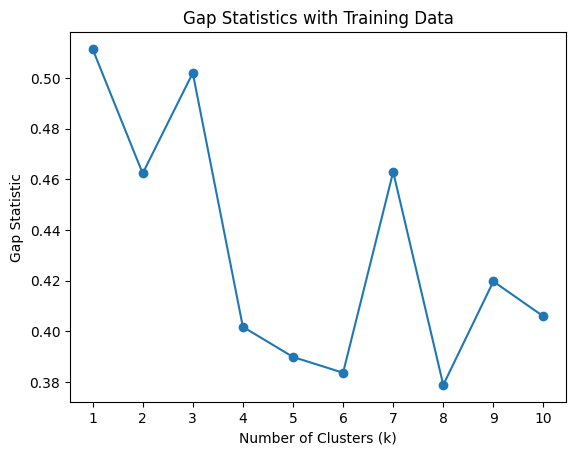

In [18]:
# Gap Statistics
from gap_statistic import OptimalK

# Define the range of cluster values to explore
cluster_range = np.arange(1, 11)
optimal_k = OptimalK(parallel_backend='joblib')
optimal_k(X_train, cluster_array=cluster_range)

n_clusters = optimal_k.gap_df.n_clusters.values[np.argmax(optimal_k.gap_df.gap_value.values)]
print("Optimal number of clusters:", n_clusters)

plt.plot(cluster_range, optimal_k.gap_df.gap_value.values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistics with Training Data')
plt.xticks(range(1, 11))
plt.show()

In [19]:
optimal_k.gap_df

,n_clusters,gap_value,ref_dispersion_std,sk,gap*,sk*,diff,diff*
0,1.0,0.511492,202294.926832,0.003874,2.411593e+07,2.784766e+07,0.070228,2.628441e+07
1,2.0,0.462355,689441.324935,0.021092,1.388961e+07,1.605809e+07,-0.021918,1.536769e+07
2,3.0,0.502000,371416.707182,0.017727,9.500284e+06,1.097836e+07,0.101988,1.026796e+07
3,4.0,0.401802,23259.743260,0.001790,4.961905e+06,5.729577e+06,0.014236,5.598015e+06
4,5.0,0.389928,26035.080039,0.002362,4.111262e+06,4.747372e+06,0.017799,4.647054e+06
5,6.0,0.383691,108787.347253,0.011562,3.450619e+06,3.986412e+06,-0.061114,3.988418e+06
6,7.0,0.462960,145679.428474,0.018155,3.453458e+06,3.991256e+06,0.100238,3.833449e+06
7,8.0,0.378884,108693.445811,0.016162,2.438226e+06,2.818217e+06,0.011715,2.841723e+06
8,9.0,0.419737,321141.214759,0.052567,2.451935e+06,2.855432e+06,0.039263,2.784449e+06
9,10.0,0.405920,138565.609532,0.025446,2.115567e+06,2.448081e+06,NaN,NaN


# **Data Modelling and Analysis**

In [134]:
# Create a KMeans model
kmeans_model = KMeans(n_clusters=3, random_state=42)

# Fit the model to the training data
kmeans_model.fit(X_train)

# Predict the labels for the validation data
y_pred = kmeans_model.predict(X_val)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [135]:
y_pred

array([0, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 2, 2, 0, 0, 2,
       1, 2, 2, 2, 2, 2, 1, 0, 1, 1, 1, 0, 1, 0, 2, 1, 1, 1, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 2,
       2, 1, 0, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 0, 1, 1, 1, 0, 0, 2, 2,
       0, 1, 0, 0, 0, 2, 2, 1, 1, 0, 0, 0, 1, 2, 2, 0, 2, 2, 1, 2, 2, 0,
       0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 2, 1, 0, 2, 1, 2, 1, 0, 0, 0, 2, 0,
       0, 1, 2, 2, 0, 1, 2, 2, 1, 0, 0, 1, 1, 2, 1, 2, 0, 2, 0, 2, 1, 0,
       1, 2, 0, 1, 0, 1, 1, 0, 0, 2, 1, 1, 2, 1, 1, 2, 1, 2, 0, 2, 0, 0,
       2, 0, 2, 0, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 1, 0, 2, 0, 0, 1, 0,
       0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 1, 2, 1, 0, 0, 0, 0, 2, 1, 2,
       2, 2, 2, 0, 0, 1, 1, 2, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 0,
       1, 0, 1, 2, 0, 0, 1, 0, 2, 2, 2, 1, 2, 2, 0, 1, 2, 2, 1, 2, 2, 0,
       1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 0, 2, 0, 2, 2, 2,
       2, 2, 0, 1, 1, 1, 2, 1, 1, 0, 2, 2, 0, 0, 2,

In [136]:
labels = kmeans_model.labels_
centroids = kmeans_model.cluster_centers_

In [137]:
labels

array([0, 2, 0, ..., 0, 1, 2], dtype=int32)

In [138]:
centroids

array([[ 50.722416 ,   4.6268992],
       [-19.121288 , -43.96073  ],
       [-27.777822 ,  40.305843 ]], dtype=float32)

In [132]:
np.unique(labels)

array([0, 1, 2], dtype=int32)

In [133]:
# Map cluster labels to X_train data points
X_train_with_predictions = pd.DataFrame({'Feature1': X_train[:, 0], 'Feature2': X_train[:, 1], 'cluster_label': labels})
X_train_with_predictions

,Feature1,Feature2,cluster_label
0,39.441780,48.747818,0
1,5.270911,15.974469,2
2,60.179085,-19.802868,0
3,39.499672,48.439342,0
4,61.726826,-13.778096,0
...,...,...,...
8905,-21.093616,25.942503,2
8906,86.076599,32.056145,0
8907,50.131584,17.523788,0
8908,13.014835,-62.323616,1


In [83]:
# Map cluster y_pred to X_val data points
X_val_with_predictions = pd.DataFrame({'Feature1': X_val[:, 0], 'Feature2': X_val[:, 1], 'predicted_cluster_label': y_pred})
X_val_with_predictions

,Feature1,Feature2,predicted_cluster_label
0,49.331264,-47.062950,0
1,-29.174725,42.291153,2
2,-60.500854,-14.580714,1
3,22.489794,58.405891,2
4,-29.496178,-75.964035,1
...,...,...,...
985,34.421215,-49.113358,1
986,5.295516,-69.037064,1
987,-30.056175,-37.669708,1
988,-33.076588,44.456516,2


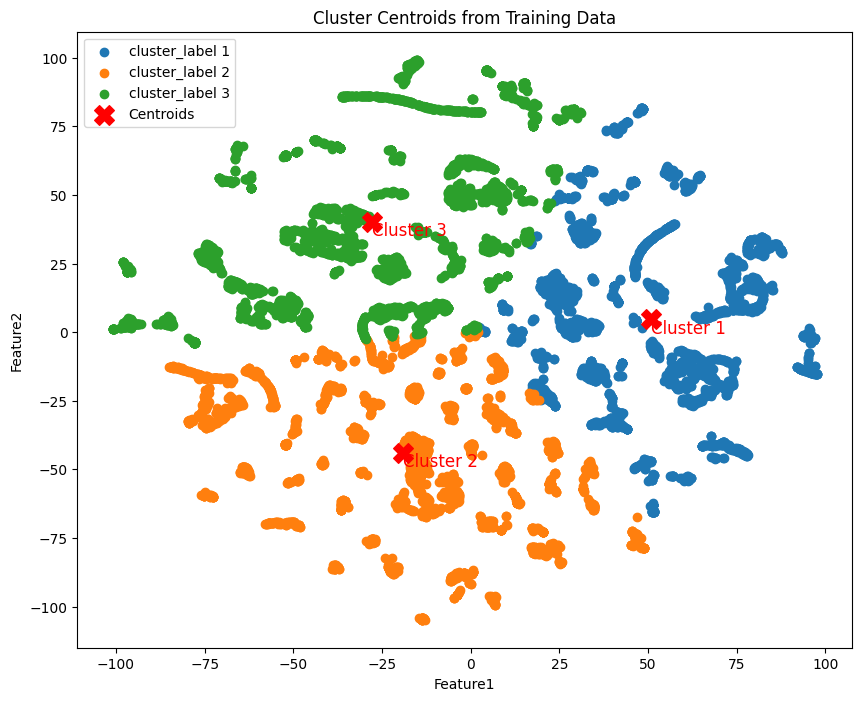

In [84]:
# Plot the scatter plot with different colors for each cluster
plt.figure(figsize=(10, 8))
for cluster in range(3):
    cluster_data_train = X_train_with_predictions[X_train_with_predictions['cluster_label'] == cluster]
    plt.scatter(cluster_data_train.iloc[:, 0], cluster_data_train.iloc[:, 1], label=f'cluster_label {cluster + 1}')

# Plot centroids (optional)
# centroids_temp = scaler.transform(centroids)
centroids_temp = centroids
plt.scatter(centroids_temp[:, 0], centroids_temp[:, 1], marker='X', s=200, c='red', label='Centroids')

for i, centroid in enumerate(centroids_temp):
    plt.text(centroid[0], centroid[1], f'Cluster {i+1}', color='red', fontsize=12, ha='left', va='top')

plt.title('Cluster Centroids from Training Data')
plt.xlabel(X_train_with_predictions.columns[0])
plt.ylabel(X_train_with_predictions.columns[1])
plt.legend(loc='upper left')
plt.show()

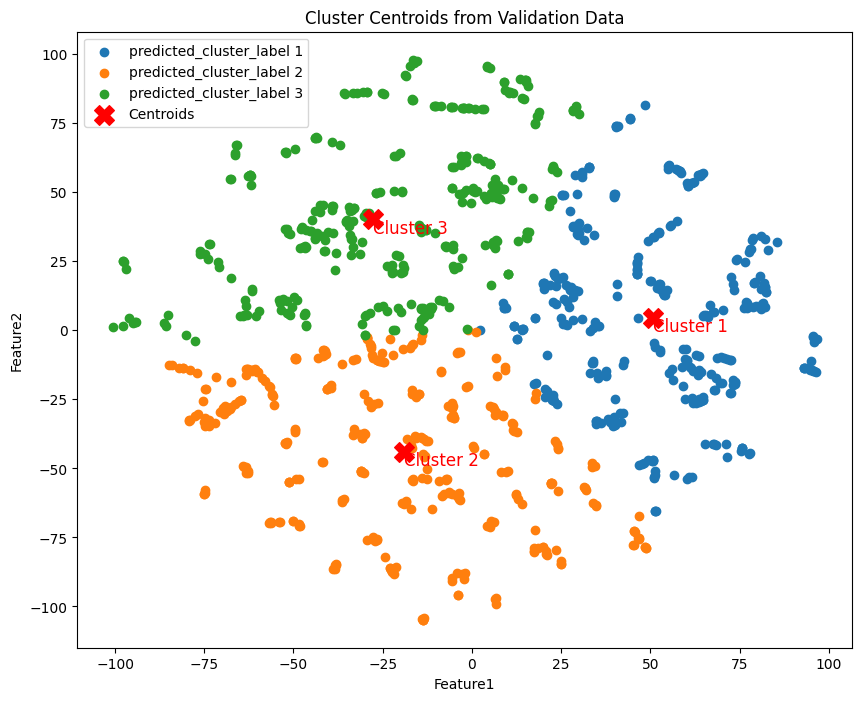

In [85]:
# Plot the scatter plot with different colors for each cluster
plt.figure(figsize=(10, 8))
for cluster in range(3):
    cluster_data_val = X_val_with_predictions[X_val_with_predictions['predicted_cluster_label'] == cluster]
    plt.scatter(cluster_data_val.iloc[:,0], cluster_data_val.iloc[:,1], label=f'predicted_cluster_label {cluster + 1}')

# Plot centroids (optional)
# centroids_temp = scaler.transform(centroids)
centroids_temp = centroids
plt.scatter(centroids_temp[:, 0], centroids_temp[:, 1], marker='X', s=200, c='red', label='Centroids')

for i, centroid in enumerate(centroids_temp):
    plt.text(centroid[0], centroid[1], f'Cluster {i+1}', color='red', fontsize=12, ha='left', va='top')

plt.title('Cluster Centroids from Validation Data')
plt.xlabel(X_val_with_predictions.columns[0])
plt.ylabel(X_val_with_predictions.columns[1])
plt.legend(loc='upper left')
plt.show()

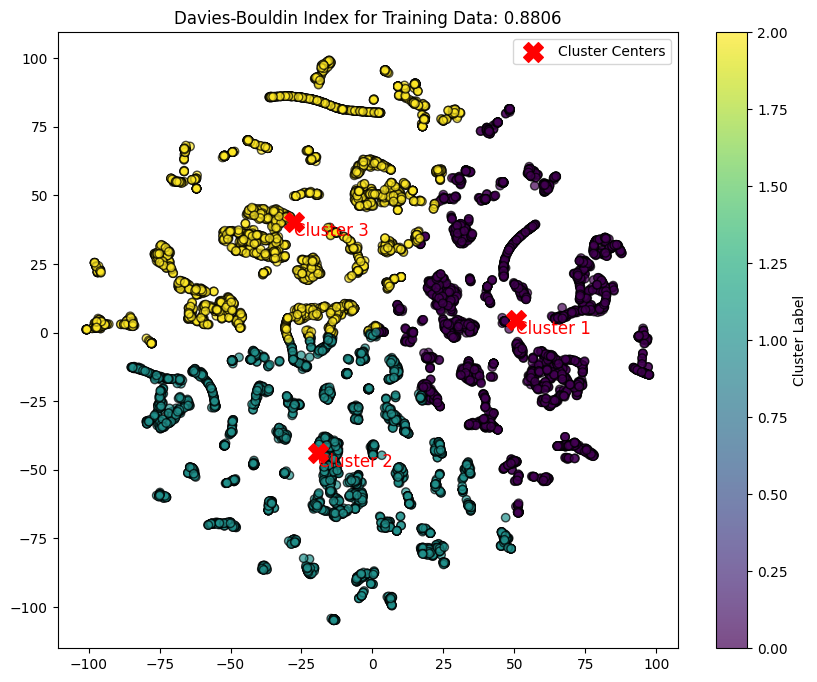

In [86]:
# Davies-Bouldin Index is the ratio of mean inter-cluster variance to mean intra-cluster variance

plt.figure(figsize=(10, 8))

# Calculate Davies-Bouldin Index
db_index_train = metrics.davies_bouldin_score(X_train, labels)

# Plot the data and cluster centers
# scatter = plt.scatter(X_train[features[0]], X_train[features[1]], c = [plt.cm.viridis(i) for i in labels], cmap='viridis', edgecolors='k', alpha=0.7)
scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c = labels, cmap='viridis', edgecolors='k', alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Cluster Centers')

for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Cluster {i+1}', color='red', fontsize=12, ha='left', va='top')

# Add colorbar for better interpretation of Davies-Bouldin Index values
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster Label')

plt.title(f'Davies-Bouldin Index for Training Data: {db_index_train:.4f}')
# plt.xlabel(X_val.columns[0])
# plt.ylabel(X_val.columns[1])
plt.legend()
plt.show()

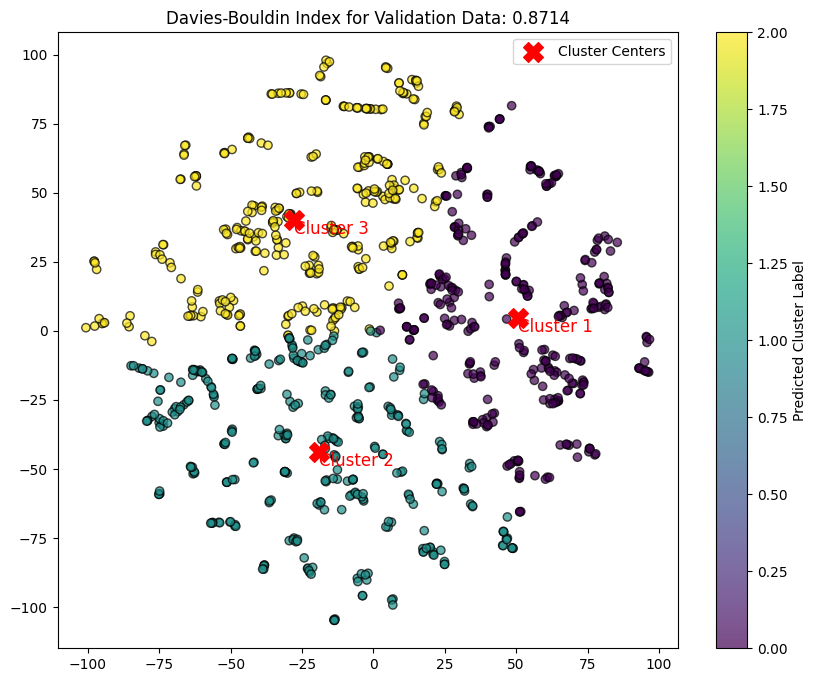

In [87]:
plt.figure(figsize=(10, 8))

# Calculate Davies-Bouldin Index
db_index_val = metrics.davies_bouldin_score(X_val, y_pred)

# Plot the data and cluster centers
# plt.scatter(X_val[features[0]], X_val[features[1]], c = [plt.cm.viridis(i) for i in y_pred], cmap='viridis', edgecolors='k', alpha=0.7)
scatter = plt.scatter(X_val[:, 0], X_val[:, 1], c = y_pred, cmap='viridis', edgecolors='k', alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Cluster Centers')

for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Cluster {i+1}', color='red', fontsize=12, ha='left', va='top')

# Add colorbar for better interpretation of Davies-Bouldin Index values
cbar = plt.colorbar(scatter)
cbar.set_label('Predicted Cluster Label')

plt.title(f'Davies-Bouldin Index for Validation Data: {db_index_val:.4f}')
# plt.xlabel(X_val.columns[0])
# plt.ylabel(X_val.columns[1])
plt.legend()
plt.show()

In [88]:
# It Provides a measure of how well-separated clusters are in the data with the score ranging from -1 to 1
silhouette_score_value1 = silhouette_score(X_train, labels)
print("Silhouette Score for Training Data:", silhouette_score_value1)

silhouette_score_value2 = silhouette_score(X_val, y_pred)
print("Silhouette Score for Validation Data:", silhouette_score_value2)

Silhouette Score for Training Data: 0.37031066
Silhouette Score for Validation Data: 0.369354


<ipython-input-89-6c07dd74b531>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(np.unique(labels)))


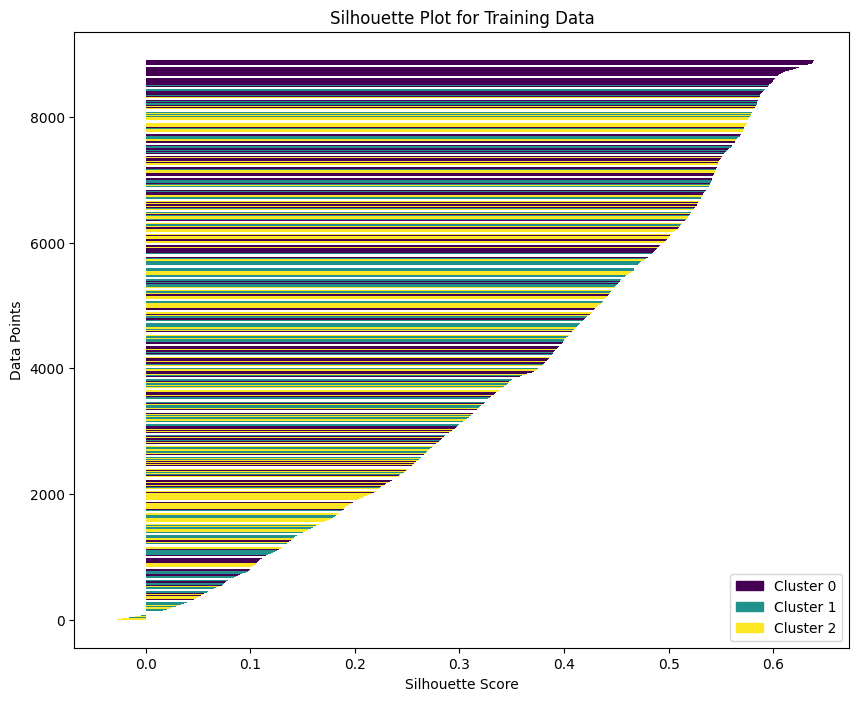

In [89]:
# Silhouette Plots

plt.figure(figsize=(10, 8))

# Create a color map with a unique color for each cluster
colors = plt.cm.get_cmap('viridis', len(np.unique(labels)))

silhouette_train_vals = silhouette_samples(X_train, labels)
sorted_idx = np.argsort(silhouette_train_vals)

# Plot the silhouette bars
bars = plt.barh(range(len(X_train)), silhouette_train_vals[sorted_idx], color=colors(labels[sorted_idx]))

# # Annotate each bar with its cluster label
# for bar, label in zip(bars, labels[sorted_idx]):
#     plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, str(label), va='center', ha='left')

# Create legend based on unique cluster labels
unique_labels = np.unique(labels)
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=colors(label)) for label in unique_labels]
plt.legend(legend_handles, [f'Cluster {label}' for label in unique_labels], loc='lower right')

plt.title('Silhouette Plot for Training Data')
plt.xlabel('Silhouette Score')
plt.ylabel('Data Points')
plt.show()

<ipython-input-90-f7181de7db1c>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(np.unique(y_pred)))


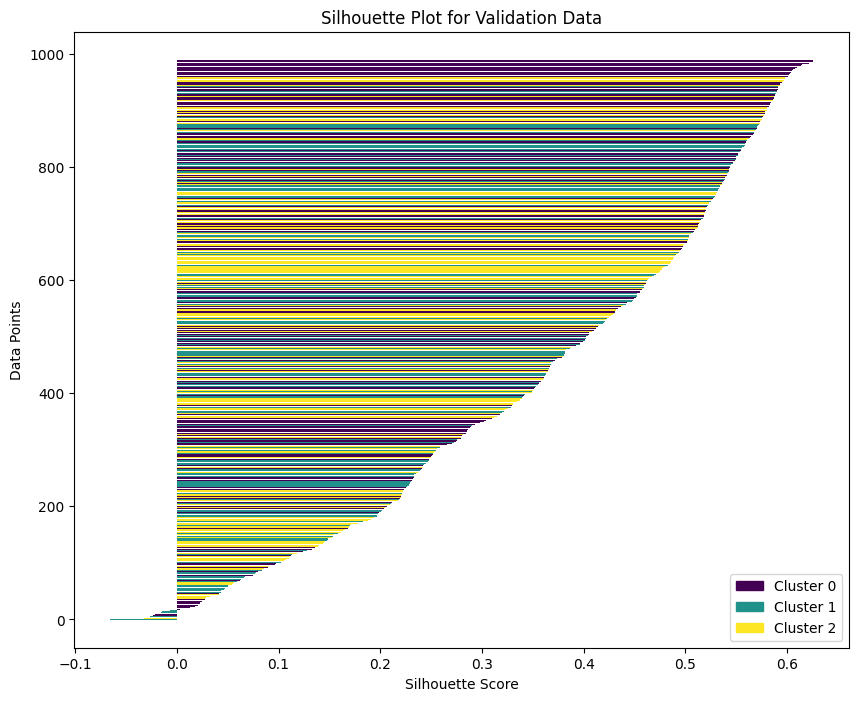

In [90]:
plt.figure(figsize=(10, 8))

# Create a color map with a unique color for each cluster
colors = plt.cm.get_cmap('viridis', len(np.unique(y_pred)))

silhouette_val_vals = silhouette_samples(X_val, y_pred)
sorted_idx = np.argsort(silhouette_val_vals)

# Plot the silhouette bars
bars = plt.barh(range(len(X_val)), silhouette_val_vals[sorted_idx], color=colors(y_pred[sorted_idx]))

# Create legend based on unique cluster labels
unique_labels = np.unique(y_pred)
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=colors(label)) for label in unique_labels]
plt.legend(legend_handles, [f'Cluster {label}' for label in unique_labels], loc='lower right')

plt.title('Silhouette Plot for Validation Data')
plt.xlabel('Silhouette Score')
plt.ylabel('Data Points')
plt.show()

# **Performance Evaluation with Labelled Validation Data**

In [157]:
# Convert X_val numpy array to dataframe
X_test = pd.DataFrame({'Feature1': X_val[:, 0], 'Feature2': X_val[:, 1]})
X_test

,Feature1,Feature2
0,49.331264,-47.062950
1,-29.174725,42.291153
2,-60.500854,-14.580714
3,22.489794,58.405891
4,-29.496178,-75.964035
...,...,...
985,34.421215,-49.113358
986,5.295516,-69.037064
987,-30.056175,-37.669708
988,-33.076588,44.456516


In [176]:
y_test = y_val.astype(int)
y_test

8432    2
5680    1
4767    1
9218    2
621     2
       ..
8640    2
9155    2
594     2
5563    1
3434    1
Name: predicted, Length: 990, dtype: int64

In [159]:
# Assuming labels_true contains the true labels for your validation set
labels_true = y_test
labels_true

8432    2
5680    1
4767    1
9218    2
621     2
       ..
8640    2
9155    2
594     2
5563    1
3434    1
Name: predicted, Length: 990, dtype: int64

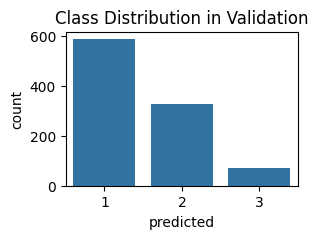

In [140]:
# Class Distribution
plt.figure(figsize=(3, 2))
sns.countplot(x=y_val)
plt.title('Class Distribution in Validation')
plt.show()

In [142]:
# Assuming labels_test contains the predicted labels for your validation set
labels_test = y_pred

In [143]:
np.unique(labels_true)

array([1, 2, 3])

In [144]:
np.unique(labels_test)

array([0, 1, 2], dtype=int32)

In [145]:
# Aligning the Predicted Labels as per True Labels to avoid confusion

aligned_labels_test = labels_test + 1
aligned_labels_test

array([1, 3, 2, 3, 2, 3, 3, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 3, 3, 1, 1, 3,
       2, 3, 3, 3, 3, 3, 2, 1, 2, 2, 2, 1, 2, 1, 3, 2, 2, 2, 1, 3, 2, 3,
       2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 3,
       3, 2, 1, 2, 2, 1, 2, 1, 1, 3, 2, 3, 3, 3, 1, 2, 2, 2, 1, 1, 3, 3,
       1, 2, 1, 1, 1, 3, 3, 2, 2, 1, 1, 1, 2, 3, 3, 1, 3, 3, 2, 3, 3, 1,
       1, 2, 2, 1, 2, 3, 1, 2, 1, 1, 3, 2, 1, 3, 2, 3, 2, 1, 1, 1, 3, 1,
       1, 2, 3, 3, 1, 2, 3, 3, 2, 1, 1, 2, 2, 3, 2, 3, 1, 3, 1, 3, 2, 1,
       2, 3, 1, 2, 1, 2, 2, 1, 1, 3, 2, 2, 3, 2, 2, 3, 2, 3, 1, 3, 1, 1,
       3, 1, 3, 1, 2, 2, 3, 3, 1, 1, 2, 2, 3, 1, 2, 2, 1, 3, 1, 1, 2, 1,
       1, 3, 1, 3, 3, 3, 3, 3, 1, 3, 1, 1, 2, 3, 2, 1, 1, 1, 1, 3, 2, 3,
       3, 3, 3, 1, 1, 2, 2, 3, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 3, 2, 2, 1,
       2, 1, 2, 3, 1, 1, 2, 1, 3, 3, 3, 2, 3, 3, 1, 2, 3, 3, 2, 3, 3, 1,
       2, 2, 2, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 1, 3, 1, 3, 3, 3,
       3, 3, 1, 2, 2, 2, 3, 2, 2, 1, 3, 3, 1, 1, 3,

In [146]:
np.unique(aligned_labels_test)

array([1, 2, 3], dtype=int32)

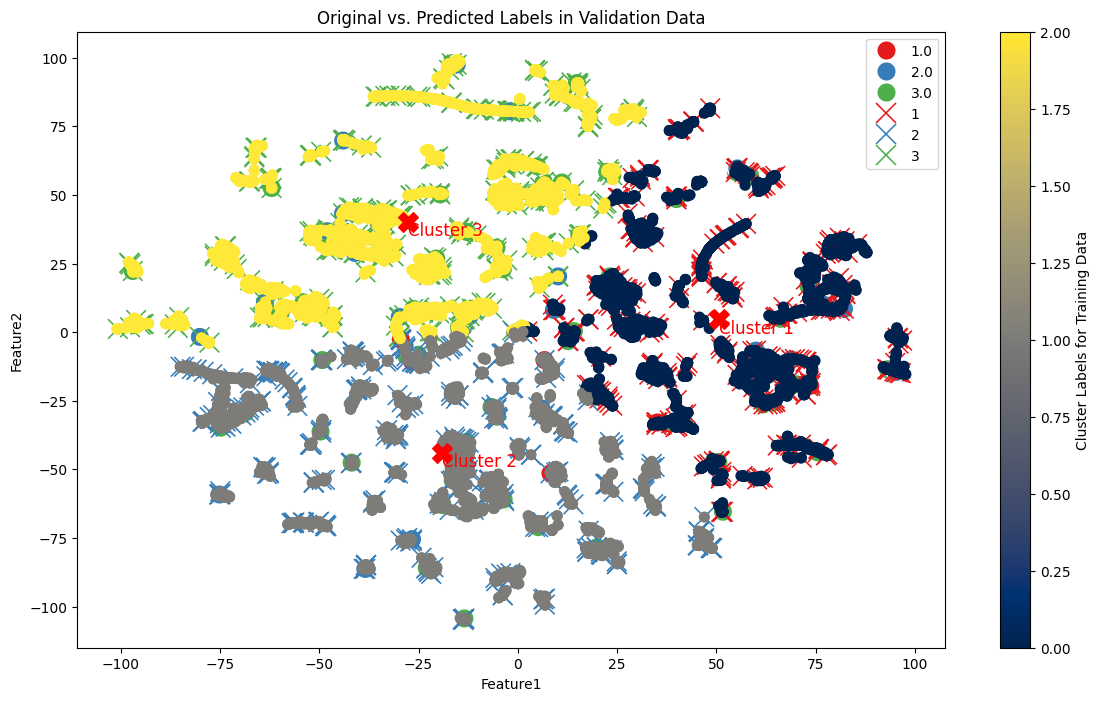

In [173]:
# Original vs. Predicted Labels

plt.figure(figsize=(14, 8))

# sns.scatterplot(x=features[0], y=features[1], hue='slice Type', data=test_data)
sns.scatterplot(x=X_test.iloc[:,0], y=X_test.iloc[:,1], hue=labels_true, data=X_test, palette='Set1', s=200)
sns.scatterplot(x=X_test.iloc[:,0], y=X_test.iloc[:,1], hue=aligned_labels_test, data=X_test, palette='Set1', s=200, marker='x')

scatter=plt.scatter(X_train[:,0], X_train[:,1], s=50, c = labels, cmap='cividis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red')
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster Labels for Training Data')

for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Cluster {i+1}', color='red', fontsize=12, ha='left', va='top')

plt.title('Original vs. Predicted Labels in Validation Data')
plt.legend()
plt.show()

In [180]:
# Calculate the Adjusted Rand Index - It is the measure of the similarity of datapoints presents in the clusters and it ranges between 0 and 1
ari = adjusted_rand_score(labels_true, aligned_labels_test)

# Print or use the ARI for evaluation
print("Adjusted Rand Index for Testing(Labelled) Data:", ari)

Adjusted Rand Index for Testing(Labelled) Data: 0.04567746467037895


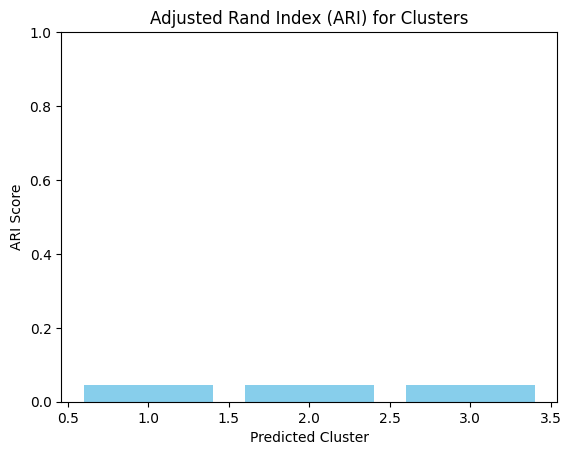

In [181]:
# Visualize ARI
# plt.figure(figsize=(8, 4))
plt.bar((np.unique(aligned_labels_test)), [ari], color=['skyblue'])
plt.ylim(0, 1)  # ARI ranges from 0 to 1
plt.title('Adjusted Rand Index (ARI) for Clusters')
plt.xlabel('Predicted Cluster')
plt.ylabel('ARI Score')
plt.show()

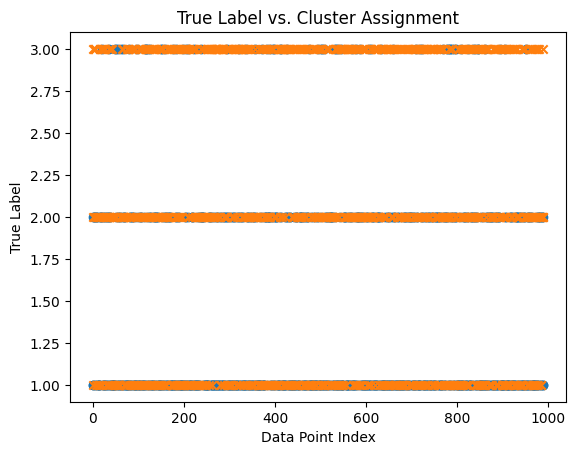

In [182]:
#  Individual Data Point Comparison

# plt.scatter(range(len(labels_true)), labels_true, c=labels_test, cmap='viridis')
plt.scatter(range(len(labels_true)), labels_true, marker='o', label='True Label')
plt.scatter(range(len(labels_test)), aligned_labels_test, marker='x', label='Cluster Assignment')

plt.title('True Label vs. Cluster Assignment')
plt.xlabel('Data Point Index')
plt.ylabel('True Label')
plt.show()

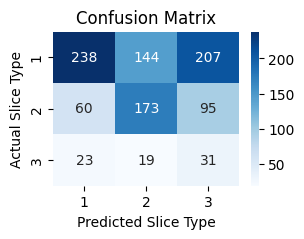

In [183]:
# Confusion Matrix
plt.figure(figsize=(3, 2))
cm = confusion_matrix(labels_true, aligned_labels_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(labels_true), yticklabels=np.unique(aligned_labels_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Slice Type')
plt.ylabel('Actual Slice Type')
plt.show()

In [161]:
# Calculate accuracy
print("Accuracy", accuracy_score(labels_true, aligned_labels_test))

# Calculate precision
print("Precision", precision_score(labels_true, aligned_labels_test, average='weighted'))

# Calculate recall
print("Recall", recall_score(labels_true, aligned_labels_test, average='weighted'))

# Calculate F1-score
print("F1-score", f1_score(labels_true, aligned_labels_test, average='weighted'))

Accuracy 0.44646464646464645
Precision 0.6185664626474595
Recall 0.44646464646464645
F1-score 0.4951068218122643


## Centroid Distance Evaluation

In [184]:
distances = kmeans_model.transform(X_test)  # Calculate distances from test data to centroids
closest_centroids_indices = distances.argmin(axis=1)  # Find the index of the closest centroid for each test data point

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


In [185]:
distances

array([[ 51.70857 ,  68.52281 , 116.52947 ],
       [ 88.32977 ,  86.835815,   2.427507],
       [112.869606,  50.748928,  63.900948],
       ...,
       [ 91.182144,  12.615417,  78.00883 ],
       [ 92.78293 ,  89.51179 ,   6.730899],
       [ 83.64498 ,  21.59944 , 102.1873  ]], dtype=float32)

In [186]:
closest_centroids_indices

array([0, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 2, 2, 0, 0, 2,
       1, 2, 2, 2, 2, 2, 1, 0, 1, 1, 1, 0, 1, 0, 2, 1, 1, 1, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 2,
       2, 1, 0, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 0, 1, 1, 1, 0, 0, 2, 2,
       0, 1, 0, 0, 0, 2, 2, 1, 1, 0, 0, 0, 1, 2, 2, 0, 2, 2, 1, 2, 2, 0,
       0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 2, 1, 0, 2, 1, 2, 1, 0, 0, 0, 2, 0,
       0, 1, 2, 2, 0, 1, 2, 2, 1, 0, 0, 1, 1, 2, 1, 2, 0, 2, 0, 2, 1, 0,
       1, 2, 0, 1, 0, 1, 1, 0, 0, 2, 1, 1, 2, 1, 1, 2, 1, 2, 0, 2, 0, 0,
       2, 0, 2, 0, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 1, 0, 2, 0, 0, 1, 0,
       0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 1, 2, 1, 0, 0, 0, 0, 2, 1, 2,
       2, 2, 2, 0, 0, 1, 1, 2, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 0,
       1, 0, 1, 2, 0, 0, 1, 0, 2, 2, 2, 1, 2, 2, 0, 1, 2, 2, 1, 2, 2, 0,
       1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 0, 2, 0, 2, 2, 2,
       2, 2, 0, 1, 1, 1, 2, 1, 1, 0, 2, 2, 0, 0, 2,

In [187]:
# Get the column names from the original DataFrame
X_test_column_names = X_test.columns.tolist()

# Convert X_test to a pandas DataFrame
X_test_df = pd.DataFrame(X_test, columns=X_test_column_names)  # Replace X_test_column_names with your actual column names
X_test_with_predictions = X_test_df.copy()  # Create a copy to avoid modifying the original DataFrame

# Resetting indices to avoid alignment issues
X_test_with_predictions.reset_index(drop=True, inplace=True)
X_test_with_predictions

,Feature1,Feature2
0,49.331264,-47.062950
1,-29.174725,42.291153
2,-60.500854,-14.580714
3,22.489794,58.405891
4,-29.496178,-75.964035
...,...,...
985,34.421215,-49.113358
986,5.295516,-69.037064
987,-30.056175,-37.669708
988,-33.076588,44.456516


In [188]:
X_test_with_predictions['actual_cluster_label'] = y_test
X_test_with_predictions

,Feature1,Feature2,actual_cluster_label
0,49.331264,-47.062950,3.0
1,-29.174725,42.291153,NaN
2,-60.500854,-14.580714,NaN
3,22.489794,58.405891,3.0
4,-29.496178,-75.964035,NaN
...,...,...,...
985,34.421215,-49.113358,NaN
986,5.295516,-69.037064,NaN
987,-30.056175,-37.669708,NaN
988,-33.076588,44.456516,NaN


In [189]:
# Assuming your test data has labels stored in a column named 'label'
closest_centroids_predicted_labels = [closest_centroids_indices[i] for i in range(len(X_test_with_predictions))]
# Add 1 to each predicted label to align with the range of actual labels
aligned_predicted_labels = [label + 1 for label in closest_centroids_predicted_labels]

X_test_with_predictions['predicted_cluster_label'] = aligned_predicted_labels  # Assign predicted labels to test data dataframe
X_test_with_predictions

,Feature1,Feature2,actual_cluster_label,predicted_cluster_label
0,49.331264,-47.062950,3.0,1
1,-29.174725,42.291153,NaN,3
2,-60.500854,-14.580714,NaN,2
3,22.489794,58.405891,3.0,3
4,-29.496178,-75.964035,NaN,2
...,...,...,...,...
985,34.421215,-49.113358,NaN,2
986,5.295516,-69.037064,NaN,2
987,-30.056175,-37.669708,NaN,2
988,-33.076588,44.456516,NaN,3


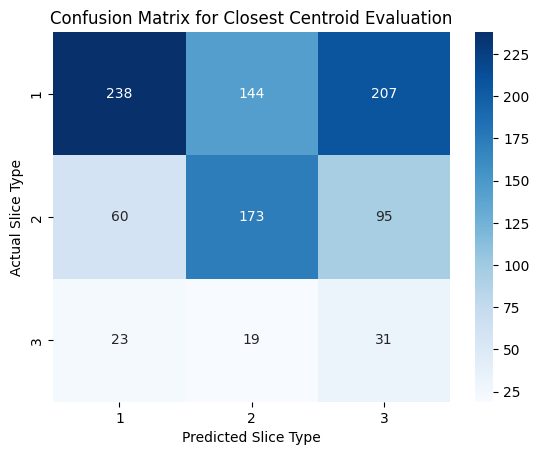

In [190]:
# Confusion Matrix

cm = confusion_matrix(labels_true, aligned_predicted_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(labels_true), yticklabels=np.unique(aligned_predicted_labels))
plt.title('Confusion Matrix for Closest Centroid Evaluation')
plt.xlabel('Predicted Slice Type')
plt.ylabel('Actual Slice Type')
plt.show()

In [191]:
# Calculate accuracy
print("Accuracy", accuracy_score(labels_true, aligned_predicted_labels))

# Calculate precision
print("Precision", precision_score(labels_true, aligned_predicted_labels, average='weighted'))

# Calculate recall
print("Recall", recall_score(labels_true, aligned_predicted_labels, average='weighted'))

# Calculate F1-score
print("F1-score", f1_score(labels_true, aligned_predicted_labels, average='weighted'))

Accuracy 0.44646464646464645
Precision 0.6185664626474595
Recall 0.44646464646464645
F1-score 0.4951068218122643


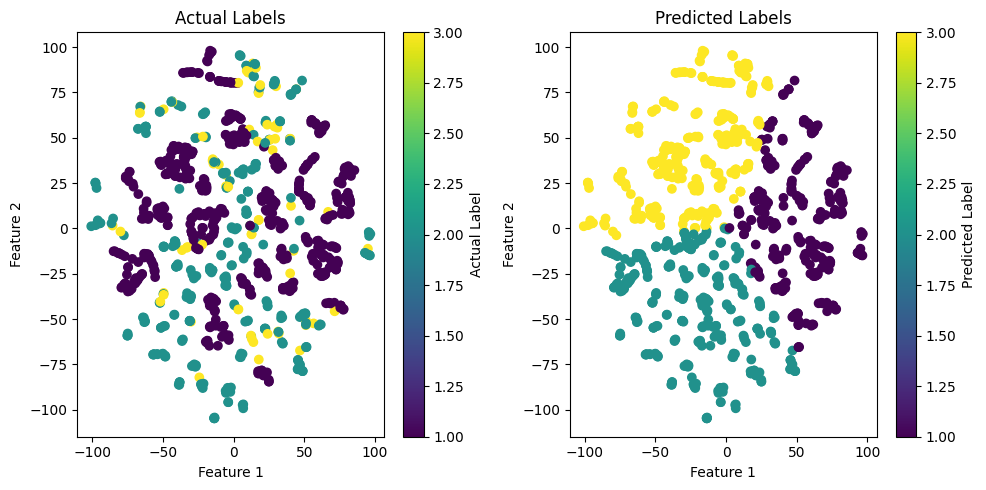

In [192]:
import matplotlib.pyplot as plt

# Scatter plot for actual labels
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_test_with_predictions['Feature1'], X_test_with_predictions['Feature2'], c=labels_true, cmap='viridis')
plt.title('Actual Labels')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Actual Label')

# Scatter plot for predicted labels
plt.subplot(1, 2, 2)
plt.scatter(X_test_with_predictions['Feature1'], X_test_with_predictions['Feature2'], c=aligned_predicted_labels, cmap='viridis')
plt.title('Predicted Labels')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Predicted Label')

plt.tight_layout()
plt.show()

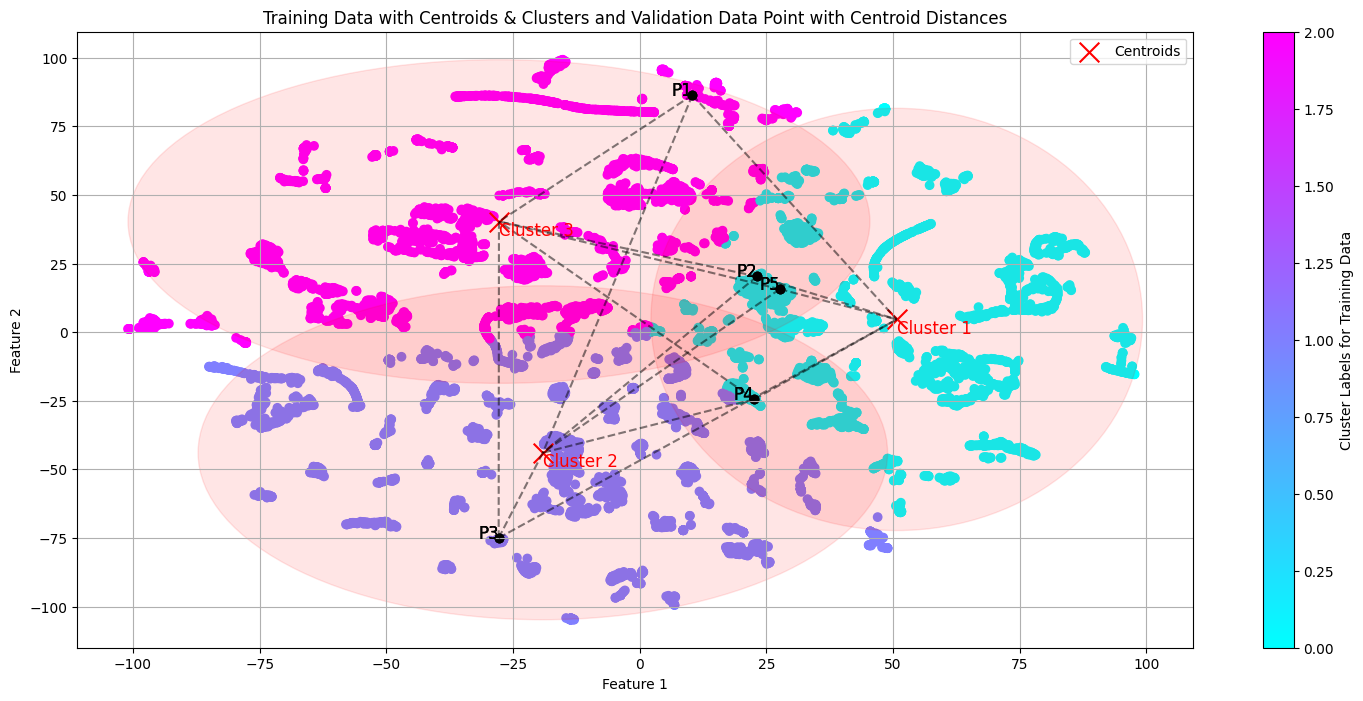

In [194]:
# import matplotlib.pyplot as plt
# import numpy as np
# from matplotlib.patches import Ellipse

# Plot training data points with centroids and clusters
plt.figure(figsize=(18, 8))

# for cluster in range(3):
#     cluster_data_test = X_train_with_predictions[X_train_with_predictions['cluster_label'] == cluster]
#     scatter=plt.scatter(cluster_data_test.iloc[:, 0], cluster_data_test.iloc[:, 1], label=f'cluster_label {cluster + 1}')

# Plot training data points
scatter=plt.scatter(X_train[:,0], X_train[:,1], c=labels, cmap='cool')

# Colour Bar for training data points
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster Labels for Training Data')

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, c='red', label='Centroids')
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Cluster {i+1}', color='red', fontsize=12, ha='left', va='top')

# Plot ovals around centroids to denote clusters
for i in range(len(centroids)):
    cluster_points = X_train[labels == i]
    # Calculate the radii along the x and y axes
    x_radius = np.max(np.abs(cluster_points[:, 0] - centroids[i, 0]))
    y_radius = np.max(np.abs(cluster_points[:, 1] - centroids[i, 1]))
    ellipse = Ellipse((centroids[i, 0], centroids[i, 1]), 2 * x_radius, 2 * y_radius, color='red', alpha=0.1)
    plt.gca().add_patch(ellipse)

# # Plot the test data point
# plt.scatter(X_test['Feature1'], X_test['Feature2'], color='black', label='Test Point')

# Draw lines from the test point to centroids
test_point_names = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10']
for point, name in zip(range(5), test_point_names):
  random_point = random.randint(1, len(X_test))
  for i in range(len(centroids)):
    plt.plot([X_test['Feature1'].iloc[random_point], centroids[i, 0]], [X_test['Feature2'].iloc[random_point], centroids[i, 1]], 'k--', alpha=0.5)

    # Annotate test data points
    plt.scatter(X_test['Feature1'].iloc[random_point], X_test['Feature2'].iloc[random_point], color='black')
    plt.text(X_test['Feature1'].iloc[random_point], X_test['Feature2'].iloc[random_point], name, fontsize=12, ha='right')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Training Data with Centroids & Clusters and Validation Data Point with Centroid Distances')
plt.legend()
plt.grid(True)

plt.show()

# **SYNC NOTEBOOKS**

In [172]:
%cp '/content/drive/MyDrive/Colab Notebooks/Exp12 - Slice_Identification_UnSupML_tsne.ipynb' '/content/drive/MyDrive/Network_Slicing_with_ML_repo/Network-Slicing-with-ML/Notebooks/'